# Week 1

Author: Khushee Kapoor

Registration Number: 200968052

To start, we import the following libraries:
- numpy: for data manipulation
- pandas: for data manipulation
- matplotlib: for data visualization
- tensorflow: for building neural networks

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

## Exercise 1

To start with Exercise 1, we import the Fashion MNIST dataset that is already pre-loaded in tensorflow as training and testing sets.

In [ ]:
# importing fashion mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Next, we preprocess the images in the Fashion MNIST dataset by scaling down the pixel values by 255 (maximum value) and reshaping the image to a 784 dimesnional vector.

In [ ]:
# preprocessing and reshaping the images
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

After that, we build the autoencoder architecture. We have the following layers:
- Input: takes in a 784 dimensional vector
- Encoder: maps the input to a 64 dimensional latent space with relu activation
- Decoder: maps the latent space back to a 784 dimensional vector with signmoid activation

We then link the above layers and put together the model.

In [ ]:
# building the autoencoder
input = tf.keras.Input(shape=(784, ))
encoder = tf.keras.layers.Dense(64, activation='relu')(input)
decoder = tf.keras.layers.Dense(784, activation='sigmoid')(encoder)
autoencoder = tf.keras.Model(input, decoder)

Next, we compile the autoencoder and fit it on the training data. We use the adam optimizer and mean squared error for the same.

In [ ]:
# compiling and training the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.0243
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0117
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0102
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0096
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088


Next, we use the autoencoder to predict the values of the testing set. 

In [ ]:
# predicting the values of the testing set
reconstructed_test = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


To check how our model performs, we plot the original and the reconstructed images from the test set. We use functions from the matplotlib library to do so.

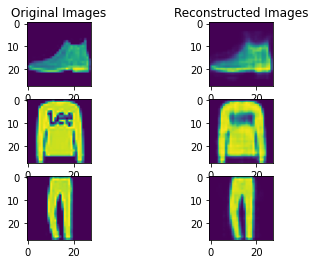

In [ ]:
# plotting the original and reconstructed images
fig, ax = plt.subplots(3, 2)
ax[0,0].set_title('Original Images')
ax[0,1].set_title('Reconstructed Images')
ax[0,0].imshow(x_test[0].reshape(28,28))
ax[0,1].imshow(reconstructed_test[0].reshape(28,28))
ax[1,0].imshow(x_test[1].reshape(28,28))
ax[1,1].imshow(reconstructed_test[1].reshape(28,28))
ax[2,0].imshow(x_test[2].reshape(28,28))
ax[2,1].imshow(reconstructed_test[2].reshape(28,28))

As we can see, the reconstructed images are somewhat distorted and donot capture the minute details of the images, however, they do give us the general shape of the images.

To quantify the above inference, we calculate the mean squared error of the reconstructed test set using the mean_squared_error function from the sklearn library.

In [ ]:
# calculating the mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(x_test, reconstructed_test))

0.009009444


As we can see, the mean squared error is not very high, which means that the autoencoder does a decent job in reproducing the input images.

## Exercise 2

To start with Exercise 2, we call the ECG5000 dataset using the Google API. 

In [ ]:
# calling the dataset using the API
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


Next, we format the raw data and the labels and then split the dataset using the train_test_split function from the sklearn library.

In [ ]:
# formatting the dataset
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

# splitting the dataset
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

After that, we scale the data values using Min Max scaling technique.

In [ ]:
# scaling the data values
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

To further format the data, we convert the labels into boolean values. Next, we segregate the normal and anomalous ECG observations using the boolean values.

In [ ]:
# formatting the labels
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

# segregating the normal and anomalous ECG observations
normal_train_data = train_data[train_labels]
anomalous_train_data = train_data[~train_labels]

To have a look at the normal and anomalous ECG observations, we plot them using functions from the matplotlib library.

Text(0.5, 1.0, 'Anomalous ECG')

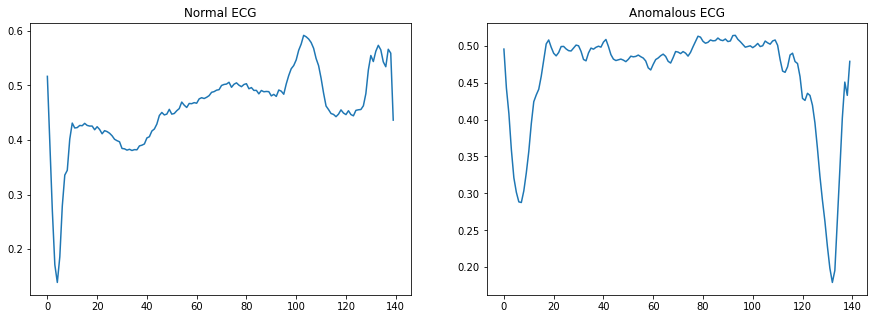

In [ ]:
# plotting the normal and anomalous ECG observations
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(np.arange(140), normal_train_data[0])
ax[0].set_title('Normal ECG')
ax[1].plot(np.arange(140), anomalous_train_data[0])
ax[1].set_title('Anomalous ECG')

Next, we build the autoencoder having the following layers:
- Input: takes in the 140 dimensional ECG vector
- Encoder: consists of 5 layers which maps the 140 dimensional input to a 8 dimensional latent space
- Decoder: consists of 5 layers which maps the 8 dimensional latent space back to a 140 dimensional output ECG observation.

We then link the above layers and put together the model.

In [ ]:
# input layer
input = tf.keras.Input(shape=(140,))

# encoder layers
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(140, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
])

# decoder layers
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(140, activation='relu'),
])

# linking the layers and putting together the model
encoded = encoder(input)
decoded = decoder(encoded)
autoencoder = tf.keras.Model(input, decoded)

Next, we compile the autoencoder and fit it on the normal ECG training data. We use the adam optimizer and mean squared error for the same.

In [ ]:
# compiling and training the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(normal_train_data, normal_train_data, epochs=20)

Epoch 1/20
73/73 [==============================] - 1s 3ms/step - loss: 0.0371
Epoch 2/20
73/73 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 3/20
73/73 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 4/20
73/73 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 5/20
73/73 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 6/20
73/73 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 7/20
73/73 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 8/20
73/73 [==============================] - 0s 4ms/step - loss: 0.0371
Epoch 9/20
73/73 [==============================] - 0s 5ms/step - loss: 0.0371
Epoch 10/20
73/73 [==============================] - 0s 6ms/step - loss: 0.0371
Epoch 11/20
73/73 [==============================] - 0s 5ms/step - loss: 0.0371
Epoch 12/20
73/73 [==============================] - 0s 4ms/step - loss: 0.0371
Epoch 13/20
73/73 [==============================

Next, we find the training loss by predicting the outcome of the normal training data and calculating the mean squared error.

In [ ]:
# calculating the training loss
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mean_squared_error(reconstructions, normal_train_data)

73/73 [==============================] - 0s 2ms/step


We use the loss calculated above to set a threshold to classify ECGs as normal or anomalous. This threshold is the mean of the training loss added to the standard deviation of the same.

In [ ]:
# calculating the threshold
threshold = np.mean(train_loss) + np.std(train_loss)

Next, we predict the values of the entire test data. To classify the anomalous observations from the test data, we check if our reconstruction error is more than the threshold. If it is, it is classified as anomalous.

In [ ]:
# predicting from test
reconstructed_test = autoencoder.predict(test_data)

# classifying as anomalous
losses = tf.keras.losses.mean_squared_error(reconstructed_test, test_data)
anomalies = tf.math.less(losses, threshold)

32/32 [==============================] - 0s 2ms/step


To check how well we've classified the anomalous ECGs, we calculate the classfication metrics.

In [ ]:
# calculating the classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(str.format('Accuracy: {:.2f}', accuracy_score(test_labels, anomalies)))
print(str.format('Precision: {:.2f}', precision_score(test_labels, anomalies)))
print(str.format('Recall: {:.2f}', recall_score(test_labels, anomalies)))

Accuracy: 0.88
Precision: 0.98
Recall: 0.82


As we can see, the accuracy is 88%, precision is 0.98, and recall is 0.82. This means that the model performs decently.